<a href="https://colab.research.google.com/github/rohjaehyung/courseworks/blob/main/tensorflow_keras_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_digits, train_labels), (test_digits, test_labels) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
train_digits, test_digits = train_digits/ 255.0 , test_digits/255.0


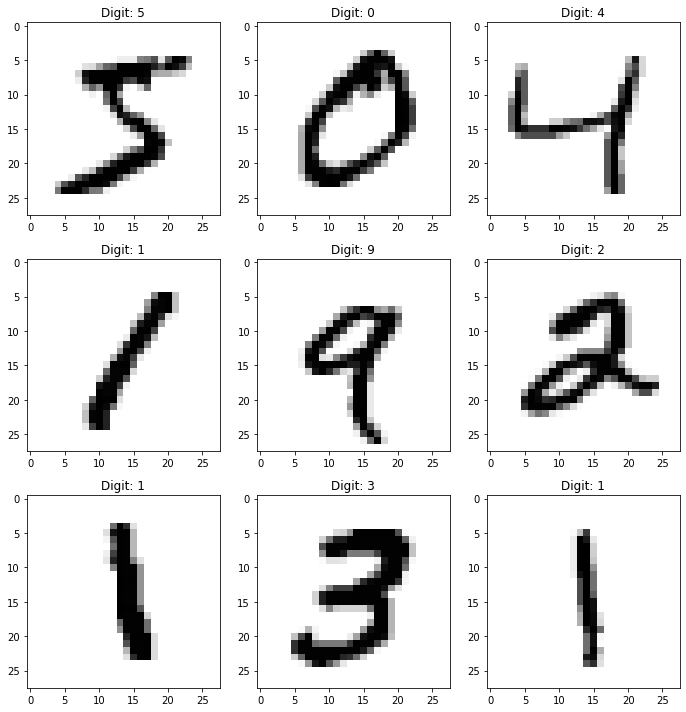

In [ ]:
# 1
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.grid(False)
  plt.imshow(train_digits[i], cmap=plt.cm.binary)
  plt.title(f"Digit: {train_labels[i]}")
  plt.tight_layout()
plt.show()


In [ ]:
#2 

train_digits = train_digits.reshape(60000, 28,28, 1)
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes= 10)

test_digits = test_digits.reshape(10000, 28,28, 1)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes= 10)

In [ ]:
# 3
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
Total params: 18,816
Trainable params: 18,816
Non-traina

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 flatten (Flatten)           (None, 288)               0

In [ ]:
#4 
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
model.add(tf.keras.layers.Dense(10, activation='softmax')) 

history = model.fit(train_digits, train_labels, epochs=10, 
                    validation_data=(test_digits, test_labels))

Epoch 1/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.1915 - accuracy: 0.9404 - val_loss: 0.0499 - val_accuracy: 0.9842
Epoch 2/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0558 - accuracy: 0.9827 - val_loss: 0.0488 - val_accuracy: 0.9859
Epoch 3/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0419 - accuracy: 0.9869 - val_loss: 0.0390 - val_accuracy: 0.9870
Epoch 4/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0339 - accuracy: 0.9893 - val_loss: 0.0340 - val_accuracy: 0.9885
Epoch 5/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0260 - accuracy: 0.9917 - val_loss: 0.0344 - val_accuracy: 0.9892
Epoch 6/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0220 - accuracy: 0.9928 - val_loss: 0.0325 - val_accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0191 - accuracy: 0.9939 - val_loss: 0.0297 -

In [ ]:
print('Accuracy')
print(history.history['accuracy'])
print('Val_Accuracy')
print(history.history['val_accuracy'])

Accuracy
[0.9403666853904724, 0.9826666712760925, 0.9869333505630493, 0.9893333315849304, 0.9916999936103821, 0.992816686630249, 0.9939000010490417, 0.9948166608810425, 0.9957666397094727, 0.9961333274841309]
Val_Accuracy
[0.9842000007629395, 0.9858999848365784, 0.9869999885559082, 0.9884999990463257, 0.9891999959945679, 0.9890000224113464, 0.9905999898910522, 0.9914000034332275, 0.9911999702453613, 0.9902999997138977]


313/313 - 3s - loss: 0.0333 - accuracy: 0.9903 - 3s/epoch - 11ms/step


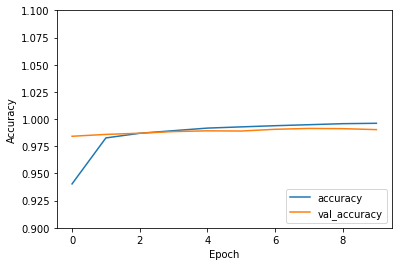

In [ ]:
# 5 
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1.1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_digits,  test_labels, verbose=2)

In [ ]:
# 6 
print(test_acc)

0.9902999997138977
